# ARE 106 Summer Session II

# Homework 3

This homework will be due on **August 29th at 2pm**

## Name: 

## SSID: 

Please put your name and SSID in the corresponding cells above.

The homework is worth 13.5 points.

For each of the following questions, show as much of your steps as you can (without going overboard). If you end up getting the wrong answer, but we spot where you made a mistake in the algebra, partial credit will be more readily given. If you only put the final answer, you will be marked either right or wrong.

Answer questions in the correct cell. For problems where you have to input math, make sure that you know that it's a markdown cell (It won't have a `In: []` on the left) and make sure you run the cell by either pressing `Ctrl + Enter` or going to `Cell -> Run Cell`. Alternatively, write all your answers and then go to `Cell -> Run All Cells` after you're done. 

Please ignore cells that read `\pagebreak`. These are so your document converts to PDF in a way that will make it possible to grade your homework. Ignore them and only write your answers where it is specified.

**When you are finished export your homework to a PDF by going to `File -> Download as -> PDF`.**

## Exercise 1: Single Regression

**Please don't forget to comment your code. Failure to do so will result in a loss of points.**

Also remember that all code that is required here (unless otherwise stated) can be found in the lecture Jupyter Notebooks or the coding notebooks from class.

Here are three models for the median starting salary of law school graduates in 1985.


\begin{gather}
log(salary_i) = b_0 + b_1 LSAT_i + e_i \\
log(salary_i) = b_0 + b_1 LSAT_i + b_2 GPA_i + e_i \\
log(salary_i) = b_0 + b_1 LSAT_i + b_2 GPA_i + b_3 log(cost_i) + b_4 rank_i + e_i
\end{gather}
    
	 
Each observation $i$ represents a school.

The variables in the dataset are:



|   | Variable           |   Description |
|---------|---------------|---------------|
|  1.     | rank               |law school ranking    |                        
|  2.     | salary             |median starting salary|
|  3.     | cost               |law school cost|
|  4.     | LSAT               |median LSAT score|
|  5.     | GPA                |median college GPA|
|  6.     | libvol             |no. volumes in lib., 1000s|
|  7.     | faculty            |no. of faculty|
|  8.     | age                |age of law sch., years|
|  9.     | clsize             |size of entering class|
| 10.     | north              |=1 if law sch in north|
| 11.     | south              |=1 if law sch in south|
| 12.     | east               |=1 if law sch in east|
| 13.     | west               |=1 if law sch in west|
| 14.     | studfac            |student-faculty ratio|
| 15.     | top10              |=1 if ranked in top 10|
| 16.     | r11_25             |=1 if ranked 11-25|
| 17.     | r26_40             |=1 if ranked 26-40|
| 18.     | r41_60             |=1 if ranked 41-60|

a. In the code cell below, write the appropriate imports you will need for this question (we will need `pandas`, `numpy` and `statsmodels.formula.api`). You can do an abbreviated import if you wish (but the standard for `pandas` is `pd`, `statsmodels.formula.api` is `smf`, and `numpy` is `np`). Afterwards, load in the data from here:

https://raw.githubusercontent.com/lordflaron/ARE106data/master/lawsch85.csv

This can be done using the `read_csv()` function. Name this dataset `raw_df`. After loading in the data, show the first *10* observations in the output. 

In [14]:
## a. Put your answer in this cell.

## import libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

## import data
raw_df = pd.read_csv("https://raw.githubusercontent.com/lordflaron/ARE106data/master/lawsch85.csv")

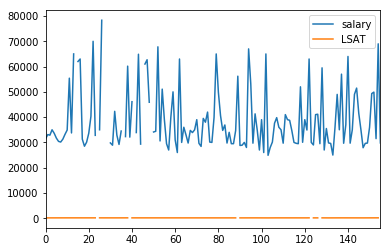

In [15]:
import pandas as pd

raw_df = pd.read_csv("https://raw.githubusercontent.com/lordflaron/ARE106data/master/lawsch85.csv")

raw_df[['salary', 'LSAT']].plot()

b. Use the `describe()` method on `raw_df` to show a table of summary statistics for each variable in the dataset. How many observations does $salary_i$ have? Write this in a print statement. (Hint: This is in the "count" row the summary table).

In [16]:
## b. Put your answer in this cell.

## describe the data
raw_df.describe()

print("there are 156 observations in salary")

there are 156 observations in salary


c. Since we'll need a log-transformed version of $salary_i$ for all our models, use `assign()` to create a new variable which is the log of $salary_i$. Name this new variable `log_salary`.

Hints:

Remember that assign is not an *inplace* operation!

Remember to use a lambda function in this case. To log a variable, you can use `np.log()`

Remember the syntax for `assign()`:

```
my_df.assign(new_variable = expression)
```

After this we now need to also drop any observations that are missing. This isn't actually how econometricians deal with missing data, but this is good enough for us for now.

You can do this by chaining the `dropna()` method after the `assign()` method.

**Warning: Do not do `dropna` BEFORE `assign`**

The end result should look something like this:

```
df = raw_df.assign(log_salary= expression).dropna()
```

In [17]:
## c. Put your answer in this cell.
df = raw_df.assign(log_salary = lambda x: np.log(x['salary'])).dropna()

d. Before estimating the model, explain how to interpret $b_1$ in Model 1.

**Please write your answer for d here. If you need to use more than one line, you may do so.**

We interpret $b_1$ here as the effect of one extra unit of LSAT score on the log of median salary.


e. Before estimating the model, explain how to interpret $b_1$ in Model 2.

**Please write your answer for e here. If you need to use more than one line, you may do so.**

In this case, we interpret this as one extra unit of LSAT score on the log of median salary, *keeping GPA unchanged*.


f. Before estimating the model, do you expect $b_1$ and $b_2$ to be positive or negative in Model 2?  Explain.
(Hint: I'm not asking for any rigorous mathematical way to answer this question. Just use your economic intuition and reasoning skills to write an argument).

**Please write your answer for f here. If you need to use more than one line, you may do so.**

It would make sense that since a higher LSAT score would lead to getting into a better law school and thus a higher median salary, The effect of LSAT should then probably be positive. Since a higher GPA would also lead to higher achievement in learning law, and excelling as a lawyer, we would also expect it to have a positive effect.


g. Estimate Model 1. Show the regression output.

In [18]:
## g. Put your answer in this cell.

mod = smf.ols('np.log(salary) ~ LSAT + GPA', data=df) ## Like writing down the equation
results = mod.fit() ## Like doing the minimization problem 
results.summary() ## Computing the numbers and showing in a table

    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     74.41
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           1.45e-19
Time:                        00:48:57   Log-Likelihood:                 36.742
No. Observations:                  90   AIC:                            -67.48
Df Residuals:                      87   BIC:                            -59.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9650      0.711      5.577      0.000       2.552       5.378
LSAT           0.0329      0.006      5.165      0.000       0.020       0.046
GPA            0.4152      0.141      2.955      0.004       0.136       0.695
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.559
Skew:                          -0.170   Prob(JB):                        0.756
Kurtosis:                       3.183   Cond. No.                     6.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

h. What is the effect of a one unit increase in LSAT score on the log of median salary?

**Please write your answer for h here. If you need to use more than one line, you may do so.**

The effect is 0.0475


i. What does the $R^2$ measure in the regression? What is the $R^2$ in this case? (Not the adjusted $R^2$).

**Please write your answer for i here. If you need to use more than one line, you may do so.**

The $R^2$ measures how much of the variability in $log_salary$ is explained by the model. The $R^2$ in this case is 0.594


## Exercise 2: Multiple Regression

This is a continuation of what we were doing in Exercise 1.

For this exercise, observe the expression for $b_1$ when there are two regressors in the equation:

$$
\hat{b_1} = \frac{\sum_i^N x_{1i} y_i \sum_i^N x_{2i}^2 - \sum_i^N x_{1i} x_{2i} \sum_i^N x_{2i} y_i}{\sum_i^N x_{1i}^2 \sum_i^N x_{2i}^2 - \left(\sum_i^N x_{1i} x_{2i} \right)^2}
$$

Hint: Notice that each of these terms in the equation look similar to either covariances or variances (in fact if you multiply the denominator and numerator by $\frac{1}{N^2}$ then they are in fact variances and covariances without changing the value of the coefficient (since $\frac{\frac{1}{N^2}}{\frac{1}{N^2}}$ is 1).

Also notice that the covariance is like an **un-normalized correlation coefficient**. So if you calculate the correlation between two variables, you won't know the covariance between the two, but you'll know the direction and strength of their relationship.

a. Estimate Model 2. Show the regression output.

In [19]:
## a. Put your answer in this cell.

mod = smf.ols('log_salary ~ LSAT +GPA ', data=df) ## Like writing down the equation
results = mod.fit() ## Like doing the minimization problem 
results.summary() ## Computing the numbers and showing in a table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     74.41
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           1.45e-19
Time:                        00:48:58   Log-Likelihood:                 36.742
No. Observations:                  90   AIC:                            -67.48
Df Residuals:                      87   BIC:                            -59.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9650      0.711      5.577      0.000       2.552       5.378
LSAT           0.0329      0.006      5.165      0.000       0.020       0.046
GPA            0.4152      0.141      2.955      0.004       0.136       0.695
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.559
Skew:                          -0.170   Prob(JB):                        0.756
Kurtosis:                       3.183   Cond. No.                     6.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

b. Calculate the correlations between $log(salary)_i$, $LSAT_i$ and $GPA_i$.

Use the slicing notation to first make a subset of the data with only log_salary, LSAT and GPA.

Then use the `corr()` method to get the correlation for those variables, i.e. it will look something like this:

`df[['log_salary', 'GPA', 'LSAT']].corr()`

This will give a matrix where you can see correlation between variables. (Note: correlation of a variable with itself is always 1).

In [20]:
## b. Put your answer in this cell.

## Calculating correlation matrix
df[['log_salary', 'GPA', 'LSAT']].corr()


,log_salary,GPA,LSAT
log_salary,1.000000,0.719707,0.770756
GPA,0.719707,1.000000,0.776454
LSAT,0.770756,0.776454,1.000000


c. Using you answer from (b) and the expression for $\hat{b_1}$ above, answer this question:

Why is $b_1$ in Model 2 different from $b_1$ in Model 1?

**Please write your answer for c here. If you need to use more than one line, you may do so.**

In this case since the correlations between $GPA$ and $LSAT$ are positive and $GPA$ and $log_salary$ is positive, this leads to lowering the coefficient on $LSAT$ to 0.0329.


d. Why is the $R^2$ in Model 2 higher than Model 1? (Not the adjusted $R^2$).

**Please write your answer for d here. If you need to use more than one line, you may do so.**

Since we added more coefficients to the model, the $R^2$ has gone up to 0.631


e. Estimate Model 3. Show the regression output.

Hint: One of the extra regressors in Model 3 is log-transformed. Instead of doing another `assign()` call, run this regression by explicitly logging the variable in the `patsy` formula. Use `np.log()` to do this.

In [21]:
## e. Put your answer in this cell.

mod = smf.ols('log_salary ~ LSAT +GPA +np.log(cost) + rank', data=df) ## Like writing down the equation
results = mod.fit() ## Like doing the minimization problem 
results.summary() ## Computing the numbers and showing in a table


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     96.24
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           9.80e-31
Time:                        00:48:59   Log-Likelihood:                 68.820
No. Observations:                  90   AIC:                            -127.6
Df Residuals:                      85   BIC:                            -115.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.0511      0.709     11.360      0.000       6.642       9.460
LSAT             0.0097      0.006      1.710      0.091      -0.002       0.021
GPA              0.2430      0.119      2.044      0.044       0.007       0.479
np.log(cost)     0.0459      0.042      1.098      0.275      -0.037       0.129
rank            -0.0034      0.000     -7.939      0.000      -0.004      -0.003
==============================================================================
Omnibus:                        0.199   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.016
Skew:                          -0.021   Prob(JB):                        0.992
Kurtosis:                       3.050   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

f. Suppose School A and School B have the same values for all the variables on the right hand side in Model 3, except School A is ranked 10 places higher than School B. What is the predicted difference in log median salary between the two schools?

This question can be answered by simply printing out the math you did in a print statement using an `f-string`.

In [22]:
## f. Put your answer in this cell.

print(f"It would be {-10*(-.0034)}")

It would be 0.033999999999999996


## Exercise 3: Multicollinearity

a. Re-estimate Model 1, except add north, south, east, and west as the additional right hand side variables.

In [23]:
## Exercise 3. Put your answer in this cell.

mod = smf.ols('log_salary ~ LSAT +north+west+south+east ', data=df) ## Like writing down the equation
results = mod.fit() ## Like doing the minimization problem 
results.summary() ## Computing the numbers and showing in a table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     31.53
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           4.27e-16
Time:                        00:48:59   Log-Likelihood:                 32.806
No. Observations:                  90   AIC:                            -55.61
Df Residuals:                      85   BIC:                            -43.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5155      0.557      4.515      0.000       1.408       3.623
LSAT           0.0467      0.004     10.639      0.000       0.038       0.055
north          0.6215      0.147      4.232      0.000       0.329       0.914
west           0.6256      0.143      4.384      0.000       0.342       0.909
south          0.6148      0.135      4.548      0.000       0.346       0.884
east           0.6536      0.147      4.437      0.000       0.361       0.947
==============================================================================
Omnibus:                        1.212   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.675
Skew:                          -0.015   Prob(JB):                        0.714
Kurtosis:                       3.423   Cond. No.                     2.09e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

b.  What is wrong with this regression? What happens when you estimate it? How could fix this problem?

Hint: Look at the warnings underneath the regression.

**Please write your answer for b here. If you need to use more than one line, you may do so.**

The warnings tell us that there is evidence of multicollinearity. This is due to the fact that we have included all four types of direction variables and we know that $north+west+east+south=1$. A way to fix this problem would be to omit one of these variables.


## Exercise 4: Auxiliary Regression

Consider the following two regressions:

\begin{gather*}
    LSAT_i = a_0 + a_1 GPA_i + v_i \\ 
    log(salary_i) = b_0 + b_1 v_i + e_i 
\end{gather*}

a. Estimate $b_1$. This is a two-step process. First, you need to estimate the first regression model and save the errors. Then, you regress $log(salary_i)$ on those errors ($v_i$). Compare your estimate of $b_1$ to the estimate you found from Model 2. Explain the similarity or difference. 

In order to do this, you need to save the errors (also called residuals) after you run the first stage. In order to do this, after fitting the first stage, the `results` variable will have an attribute `resid`. So to call the residuals all you need to do is type this: `results.resid`. 

You can then run the second stage in one of two ways:

- 1. `assign` a new variable to your data, called "residuals" and run a regresion with it like any other variable, or
- 2. Directly call `results.resid` in your second stage's `patsy formula`, i.e, ` 'log_salary ~ results.resid'`

In [24]:
## a. Put your answer in this cell.

## First stage regression
mod = smf.ols('LSAT ~ GPA', data=df) 
results = mod.fit() 

## Second stage regression using residuals from first stage.
results.summary()
mod2 = smf.ols('log_salary ~ results.resid', data=df)
mod2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     11.22
Date:                Tue, 03 Sep 2019   Prob (F-statistic):            0.00119
Time:                        00:48:59   Log-Likelihood:                -2.7297
No. Observations:                  90   AIC:                             9.459
Df Residuals:                      88   BIC:                             14.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.5537      0.027    396.926      0.000      10.501      10.607
results.resid     0.0329      0.010      3.350      0.001       0.013       0.052
==============================================================================
Omnibus:                        8.095   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.517
Skew:                           0.726   Prob(JB):                       0.0141
Kurtosis:                       2.597   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. What do you notice from the coefficient on this regression, versus the one in Model 1?

**Please write your answer for b here. If you need to use more than one line, you may do so.**

The coefficient on this regression is the same as $b_1$ from model 1.

## Exercise 5: Back to $R^2$

Suppose that we have an estimated regression model $y_i = \hat{b}_0 + \hat{b}_1 x_i +e_i$, where $\hat{b}_0,\hat{b}_1$ are estimated OLS coefficients. Let $\hat{y}_i = \hat{b}_0 + \hat{b}_1 x_i$, so that:

$$
y_i = \hat{y}_i + e_i
$$

Let's look at the next step of solving this problem in order to finally get at solving a mystery we've had during the class. 

If we wanted to solve for the $R^2$, we would use the fact that a way to understand the variability in $y_i$ is to look at its variance. And we already know that:

$$
Var(y_i) = Var(\hat{y_i} + e_i) = Var(\hat{y_i}) + Var(e_i) + 2Cov(\hat{y_i}, e_i)
$$

Up until now, we've just assumed it to be true that $Cov(\hat{y_i}, e_i)$ was 0 and it allowed us to finish the proof. But all along, we've been implicitly assuming a Gauss-Markov assumption in order to make that claim.

Which of the Gauss-Markov assumptions do we need in order to say that $Cov(\hat{y_i}, e_i)=0$?

**Hint: Don't forget that you can express the covariance in terms of expectations.**

**Hint: Try plugging in $\hat{y}_i = \hat{b}_0 + \hat{b}_1 x_i$ into this expression and seeing what you end up with.**

**Hint: Don't forget that $\sum_i^N e_i=0$**

**Please write your answer for exercise 5 here. If you need to use more than one line, you may do so.**

We can rewrite the the covariance like so:

$$
Cov(\hat{y_i}, e_i) = E\left[(\hat{y_i} - \bar{y})(e_i - \bar{e})\right]
$$

Knowing that $\bar{e}=0$, we can see that:

$$
Cov(\hat{y_i}, e_i) = E(\hat{y_i}e_i) -E(\bar{y}e_i)
$$

Since we know that $\bar{y}E(e_i)=0$, we can plug in $\hat{y_i}$ into the rest and get:

$$
Cov(\hat{y_i}, e_i) = E((\hat{b_0} + \hat{b_1} x_i)e_i)
$$

Distributing $e_i$ and the expectation operator brings us to:

$$
Cov(\hat{y_i}, e_i) = E(\hat{b_0} e_i) + E(\hat{b_1} x_i e_i)
$$

Again, we know that $\hat{b_0}E(e_i)=0$, so we are left with:

$$
Cov(\hat{y_i}, e_i) = \hat{b_1}E(x_i e_i)
$$

From CR5, we know that $E(x_i e_i)=0$, so we are done.

## Exercise 6: Data Types

Let's say that we have a population model:

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

The subscripts for the variables have been purposely omitted. For each part, rewrite the model so that it corresponds to each data type and explain why you wrote it that way.

- a. Cross-section
- b. Time Series
- c. Panel

**Please write your answer for exercise 6 here. If you need to use more than one line, you may do so.**

- a. In this case, we have $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$, where we are following several subjects $i$ in a given time.
- b. Here we have $Y_t = \beta_0 + \beta_1 X_t + \epsilon_t$, so we are following the same subject across time.
- c. Now we have $Y_{it} = \beta_0 + \beta_1 X_{it} + \epsilon_{it}$, where we are following several subjects across time.
